In [114]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [115]:
attendance_data = pd.read_csv("Desktop/Portfolio/AttendanceProject/attendance_data.csv")
attendance_data['total_home_attendance'] = attendance_data['total_home_attendance'].str.replace(',','').astype(int)
attendance_data['home_avg'] = attendance_data['home_avg'].str.replace(',','').astype(int)
attendance_data['away_avg'] = attendance_data['away_avg'].str.replace(',','').astype(int)
attendance_data['total_avg'] = attendance_data['total_avg'].str.replace(',','').astype(int)

attendance_data.dtypes

rank                       int64
year                       int64
team                      object
city                      object
home_games                 int64
total_home_attendance      int64
home_avg                   int64
away_games                 int64
away_avg                   int64
total_games                int64
total_avg                  int64
Unnamed: 11              float64
Unnamed: 12              float64
Unnamed: 13              float64
dtype: object

In [116]:
attendance_data.head(3)

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2022,Dodgers,Los Angeles,81,3861408,47671,81,31104,162,39388,NaN,NaN,NaN
1,2,2022,Cardinals,St. Louis,81,3320551,40994,80,27895,161,34485,NaN,NaN,NaN
2,3,2022,Yankees,Bronx,78,3136207,40207,81,30418,159,35220,NaN,NaN,NaN


The (convoluted) figure below shows how team rankings changed in the last 12 years.

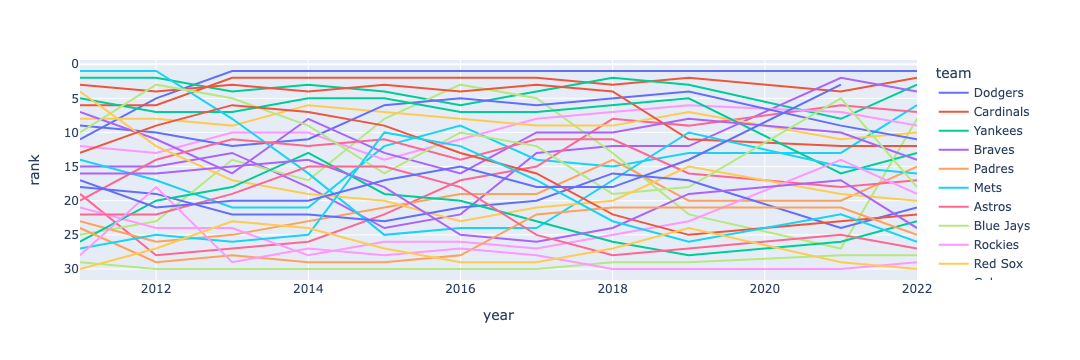

In [117]:
fig = px.line(attendance_data, x='year', y='rank',color='team')
fig.update_yaxes(autorange="reversed")
fig

Below demonstrates the average rank of each team over the last 12 years. The lower the number, the higher the average attendance rank over the last 12 years

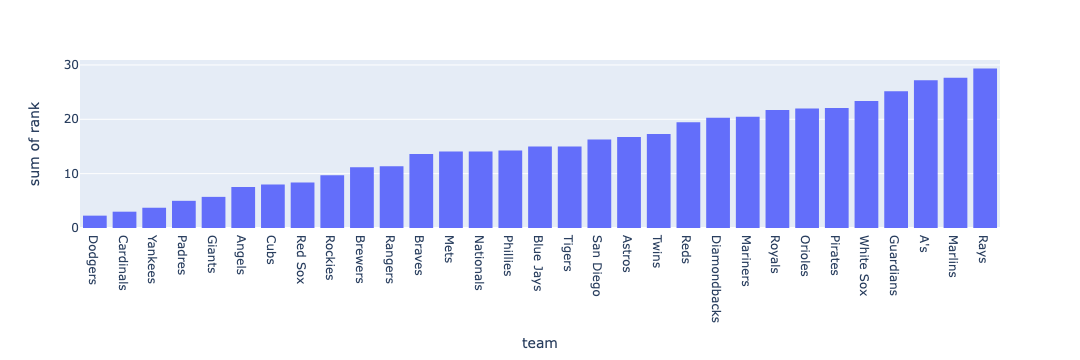

In [118]:
df_grouped = attendance_data.groupby('team').agg({
    'rank':'mean'
})

df_grouped.reset_index(inplace=True)

fig = px.histogram(df_grouped, x='team', y='rank')
fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.show()

In [119]:
top_10_attendance = df_grouped.sort_values('rank').head(10)
top_10_attendance

,team,rank
9,Dodgers,2.272727
6,Cardinals,3.000000
30,Yankees,3.727273
17,Padres,5.000000
10,Giants,5.727273
1,Angels,7.545455
7,Cubs,8.000000
22,Red Sox,8.363636
24,Rockies,9.727273
5,Brewers,11.181818


After creating a df with the top ten teams average attendance, we will now mask for these teams and redemonstrate the first figure.

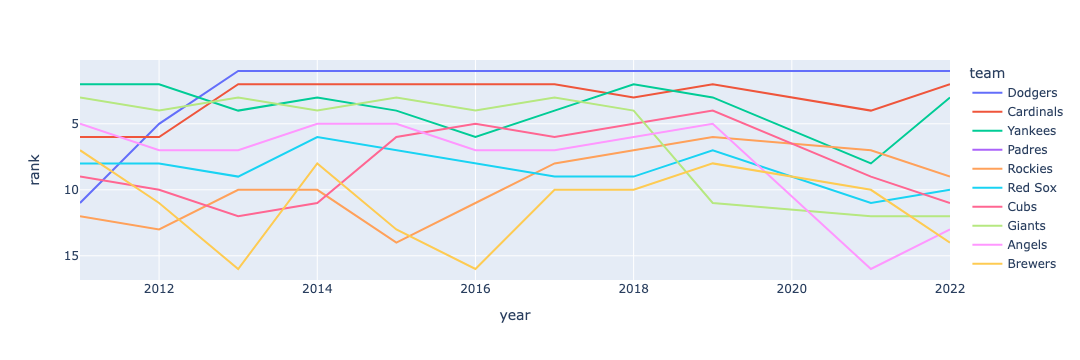

In [120]:
df_sorted = attendance_data[attendance_data['team'].isin(top_10_attendance['team'])]
fig = px.line(df_sorted, x='year', y='rank',color='team')
fig.update_yaxes(autorange="reversed")

In [121]:
top_10_agg = df_sorted.groupby(['team', 'year']).agg({
    'total_home_attendance' : 'sum', 
    'home_avg': 'sum',
    'away_avg': 'sum', 
    'total_avg': 'sum'
})

In [122]:
top_10_means = df_sorted.groupby('team').agg({
    'total_home_attendance' : 'mean', 
    'home_avg': 'mean',
    'away_avg': 'mean', 
    'total_avg': 'mean'
})
#Need to convert column types to ints

In [123]:
top_10_agg.reset_index(inplace=True)
top_10_agg

,team,year,total_home_attendance,home_avg,away_avg,total_avg
0,Angels,2011,3166321,39090,26125,32608
1,Angels,2012,3061770,37799,30831,34315
2,Angels,2013,3019505,37277,27588,32432
3,Angels,2014,3095935,38221,28174,33229
4,Angels,2015,3012765,37194,28958,33076
...,...,...,...,...,...,...
95,Yankees,2017,3146966,39835,32354,36048
96,Yankees,2018,3482855,42998,30685,36880
97,Yankees,2019,3304404,41827,30759,36258
98,Yankees,2021,1959854,24498,20612,22543


In [124]:
top_10_means.reset_index(inplace=True)
top_10_means

,team,total_home_attendance,home_avg,away_avg,total_avg
0,Angels,2.854976e+06,35246.181818,27048.545455,31150.272727
1,Brewers,2.605277e+06,32197.363636,29394.727273,30801.454545
2,Cardinals,3.271533e+06,40418.181818,29739.818182,35090.363636
3,Cubs,2.859907e+06,35263.363636,32036.909091,33654.272727
4,Dodgers,3.592467e+06,44298.181818,32581.636364,38451.000000
5,Giants,3.048279e+06,37679.181818,31762.818182,34721.909091
6,Padres,2.991470e+06,36931.000000,29754.000000,33365.000000
7,Red Sox,2.800986e+06,34579.454545,29807.545455,32194.000000
8,Rockies,2.692959e+06,33401.090909,30010.636364,31704.545455
9,Yankees,3.196799e+06,39904.909091,31237.818182,35555.454545


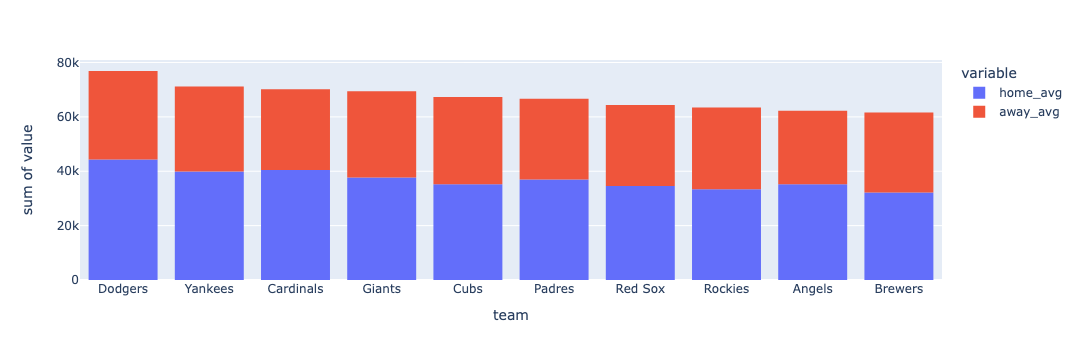

In [125]:
#Convert to stacked hist
fig = px.histogram(top_10_means, x='team',y=['home_avg', 'away_avg'])
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

The above figure demonstrates home and away attendance for the selected clubs.

The below figures will demonstrate a personal rivalry of mine, and geographically close stadiums, with attendance 

In [131]:
df_dcc = attendance_data[attendance_data['team'].isin(['Cardinals', 'Cubs'])]
df_dcc

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2022,Dodgers,Los Angeles,81,3861408,47671,81,31104,162,39388,NaN,NaN,NaN
1,2,2022,Cardinals,St. Louis,81,3320551,40994,80,27895,161,34485,NaN,NaN,NaN
10,11,2022,Cubs,Chicago,81,2616780,32305,81,29044,162,30675,NaN,NaN,NaN
30,1,2021,Dodgers,Los Angeles,81,2804693,34625,81,25163,162,29894,NaN,NaN,NaN
33,4,2021,Cardinals,St. Louis,80,2102530,26281,81,20518,161,23382,NaN,NaN,NaN
38,9,2021,Cubs,Chicago,81,1978934,24431,81,22637,162,23534,NaN,NaN,NaN
60,1,2019,Dodgers,Los Angeles,81,3974309,49065,81,33427,162,41246,NaN,NaN,NaN
61,2,2019,Cardinals,St. Louis,81,3480393,42967,81,29447,162,36207,NaN,NaN,NaN
63,4,2019,Cubs,Chicago,81,3094865,38208,81,33454,162,35831,NaN,NaN,NaN
90,1,2018,Dodgers,Los Angeles,82,3857500,47042,80,33239,162,40226,NaN,NaN,NaN


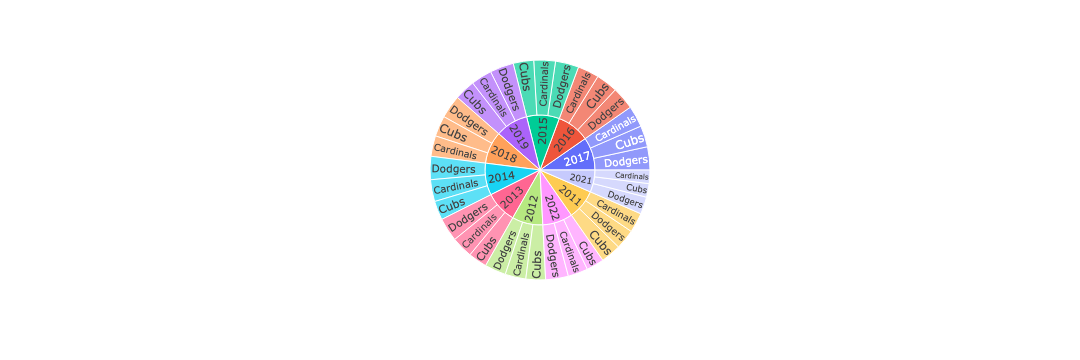

In [134]:
fig = px.sunburst(df_dcc, path = ['year','team'], values='total_avg')
fig

In [135]:
df_la = attendance_data[attendance_data['team'].isin(['Angels', 'Dodgers'])]
df_la

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2022,Dodgers,Los Angeles,81,3861408,47671,81,31104,162,39388,NaN,NaN,NaN
12,13,2022,Angels,Los Angeles,81,2457461,30339,81,25561,162,27950,NaN,NaN,NaN
30,1,2021,Dodgers,Los Angeles,81,2804693,34625,81,25163,162,29894,NaN,NaN,NaN
45,16,2021,Angels,Los Angeles,81,1512033,18667,81,19075,162,18871,NaN,NaN,NaN
60,1,2019,Dodgers,Los Angeles,81,3974309,49065,81,33427,162,41246,NaN,NaN,NaN
64,5,2019,Angels,Los Angeles,81,3023010,37321,81,26849,162,32085,NaN,NaN,NaN
90,1,2018,Dodgers,Los Angeles,82,3857500,47042,80,33239,162,40226,NaN,NaN,NaN
95,6,2018,Angels,Los Angeles,81,3020216,37286,81,28034,162,32660,NaN,NaN,NaN
120,1,2017,Dodgers,Los Angeles,81,3765856,46492,81,33579,162,40035,NaN,NaN,NaN
126,7,2017,Angels,Los Angeles,81,3019583,37278,81,27663,162,32471,NaN,NaN,NaN


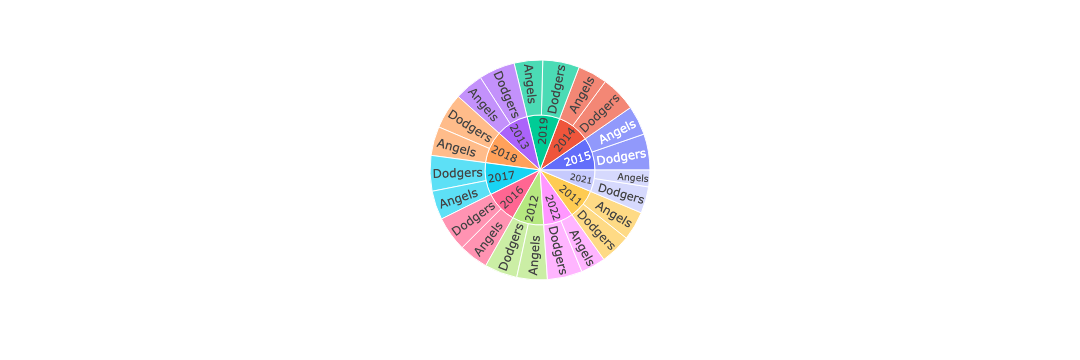

In [136]:
fig = px.sunburst(df_la, path = ['year','team'], values='total_avg')
fig

In [137]:
df_upper_mw = df_la = attendance_data[attendance_data['team'].isin(['Cubs', 'White Sox', 'Brewers'])]
df_upper_mw

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
10,11,2022,Cubs,Chicago,81,2616780,32305,81,29044,162,30675,NaN,NaN,NaN
13,14,2022,Brewers,Milwaukee,80,2412420,30155,81,27290,161,28713,NaN,NaN,NaN
18,19,2022,White Sox,Chicago,80,1976344,24704,78,22118,158,23427,NaN,NaN,NaN
38,9,2021,Cubs,Chicago,81,1978934,24431,81,22637,162,23534,NaN,NaN,NaN
39,10,2021,Brewers,Milwaukee,81,1824282,22522,81,19548,162,21035,NaN,NaN,NaN
43,14,2021,White Sox,Chicago,78,1596385,20466,80,16576,158,18496,NaN,NaN,NaN
63,4,2019,Cubs,Chicago,81,3094865,38208,81,33454,162,35831,NaN,NaN,NaN
67,8,2019,Brewers,Milwaukee,81,2923333,36090,81,29727,162,32909,NaN,NaN,NaN
82,23,2019,White Sox,Chicago,76,1629636,21442,81,24384,157,22960,NaN,NaN,NaN
94,5,2018,Cubs,Chicago,82,3181089,38793,80,32800,162,35834,NaN,NaN,NaN


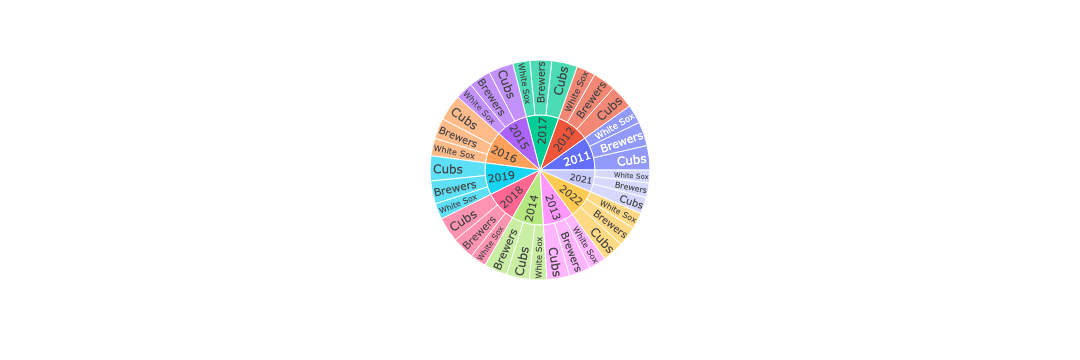

In [138]:
fig = px.sunburst(df_upper_mw, path = ['year','team'], values='total_avg')
fig

In [139]:
df_ny = df_la = attendance_data[attendance_data['team'].isin(['Yankees', 'Mets'])]
df_ny

,rank,year,team,city,home_games,total_home_attendance,home_avg,away_games,away_avg,total_games,total_avg,Unnamed: 11,Unnamed: 12,Unnamed: 13
2,3,2022,Yankees,Bronx,78,3136207,40207,81,30418,159,35220,NaN,NaN,NaN
5,6,2022,Mets,Queens,77,2564737,33308,80,29330,157,31281,NaN,NaN,NaN
37,8,2021,Yankees,Bronx,80,1959854,24498,81,20612,161,22543,NaN,NaN,NaN
42,13,2021,Mets,Queens,72,1484665,20620,79,20723,151,20674,NaN,NaN,NaN
62,3,2019,Yankees,Bronx,79,3304404,41827,80,30759,159,36258,NaN,NaN,NaN
72,13,2019,Mets,Queens,80,2442532,30531,81,29425,161,29975,NaN,NaN,NaN
91,2,2018,Yankees,Bronx,81,3482855,42998,80,30685,161,36880,NaN,NaN,NaN
104,15,2018,Mets,Queens,79,2224995,28164,80,29795,159,28985,NaN,NaN,NaN
123,4,2017,Yankees,Queens,79,3146966,39835,81,32354,160,36048,NaN,NaN,NaN
133,14,2017,Mets,Queens,80,2460622,30757,81,30372,161,30563,NaN,NaN,NaN


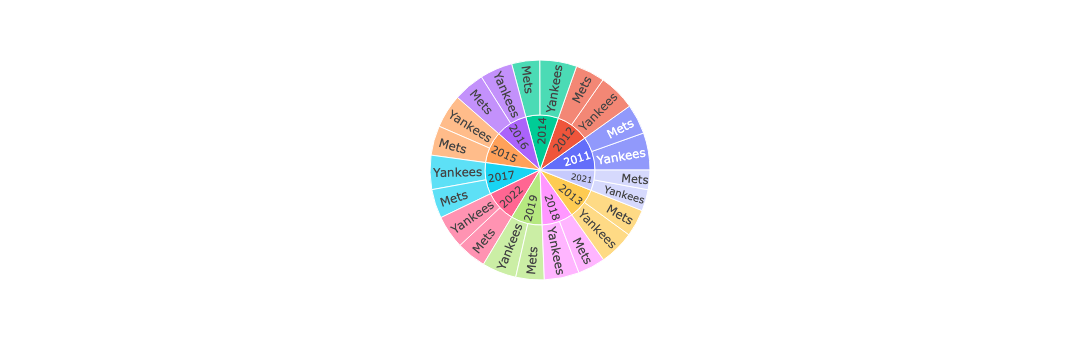

In [141]:
fig = px.sunburst(df_ny, path = ['year','team'], values='total_avg')
fig